# Hierarchical Clustering
Hierarchical clustering is an unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a clusters.In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.

The hierarchical clustering technique has two approaches:
### Agglomerative method
Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.
### Divisive method
Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.

<img src="HC_types.png" />

### Agglomerative Clustering Steps:

1. **Initialization**:
   - Start with each data point as a separate cluster.

2. **Compute Pairwise Distances**:
   - Calculate distances between cl using metrics such as Euclidean distance, Manhattan distance, or other distance measures.sters.

3. **Merge Closest Clusters**:
   - Merge the two closest based on different linkage criteria, such as single linkage, complete linkage, or average linkage.clusters.

4. **Update Distance Matrix**:
   - Recalculate distances between the new cluster and others.

5. **Repeat**:
   - Repeat steps 2-4 until termination criterion is met.

6. **Termination**:
   - Stop when desired number of clusters or distance threshold is reached.

7. **Output**:
   - Obtain a dendrogram showing cluster hierarchy and assign data points to final clusters.


### Linkage - Measure for the distance between two clusters
In agglomerative hierarchical clustering, the "linkage" refers to the criterion used to measure the distance or dissimilarity between clusters when deciding which clusters to merge at each step of the algorithm.The algorithm will merge the pairs of cluster that minimize this criterion.

‘single’ - The distance between two clusters is defined as the shortest distance between any two points in the two clusters.

‘complete’ or ‘maximum’ linkage - The distance between two clusters is defined as the longest distance between any two points in the two clusters.


‘ward- ’ minimizes the variance of the clusters being merged.

‘age' aver- The distance between two clusters is defined as the average distance between all pairs of points in the two clusters.wo sets.

### Dendrogram
<img src='dendrogram.png'>

Step-1: Firstly, the data points P2 and P3 merged together and form a cluster, correspondingly a dendrogram is created, which connects P2 and P3 with a rectangular shape. The height is decided according to the Euclidean distance between the data points.

Step-2: In the next step, P5 and P6 form a cluster, and the corresponding dendrogram is created. It is higher than the previous, as the Euclidean distance between P5 and P6 is a little bit greater than the P2 and P3.

Step-3: Again, two new dendrograms are formed that combine P1, P2, and P3 in one dendrogram, and P4, P5, and P6, in another dendrogram.

Step-4: At last, the final dendrogram is formed that combines all the data points together.

Note: As per our requirement according to the problem statement, we can cut the dendrogram at any level.

<h2 style='color:purple'> Implementation of Agglomerative Clustering</h2>

In [67]:
# import the dataset
import pandas as pd
df=pd.read_csv('Income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [68]:
#rename the column Income($) to Income
df=df.rename(columns={'Income($)':'Income'})
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [69]:
# preprocessing age and income column using min max scaler
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

df['Age']=scalar.fit_transform(df[['Age']])
df['Income']=scalar.fit_transform(df[['Income']])
df.head()

,Name,Age,Income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


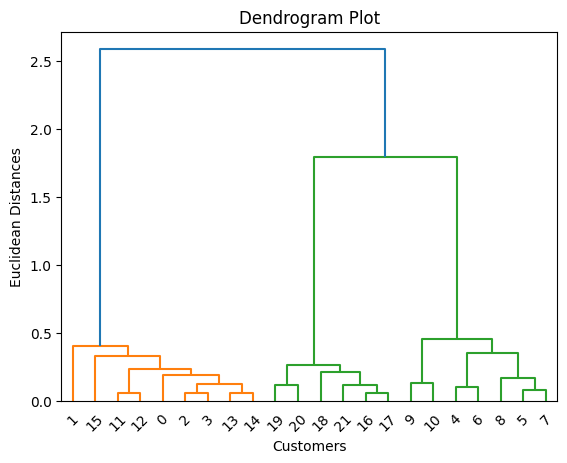

In [70]:
# Dendrogram plot
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Calculate linkage using Ward's method and create the dendrogram
dendro = shc.dendrogram(shc.linkage(df[['Age','Income']], method="ward"))

plt.title("Dendrogram Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Customers")
plt.show()


### How to Choose the Number of Clusters in Hierarchical Clustering?

To get the number of clusters for hierarchical clustering, we make use of Dendrogram.

The vertical axis of the dendrogram represents the distance or dissimilarity between clusters. More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

Now, we can set a threshold distance and draw a horizontal line.

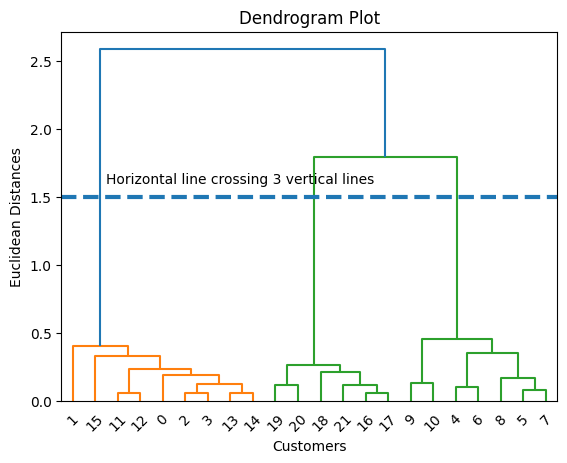

In [71]:
dendro = shc.dendrogram(shc.linkage(df[['Age','Income']], method="ward"))
plt.hlines(y=1.5,xmin=0,xmax=500,lw=3,linestyles='--')
plt.text(x=20,y=1.6,s='Horizontal line crossing 3 vertical lines')
plt.title("Dendrogram Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Customers")
plt.show()


Determining the threshold value for drawing the horizontal line in the dendrogram involves finding a balance between creating a sufficient number of clusters to capture meaningful patterns in the data and avoiding too many clusters that may result in overfitting or lack of interpretability. 

Inspect the dendrogram visually and look for significant jumps or gaps in the vertical lines. These jumps indicate larger dissimilarities between clusters and can serve as natural breakpoints for cutting the dendrogram. This point can be chosen as the threshold value for drawing the horizontal line.

The number of clusters will be the number of vertical lines intersected by the line drawn using the threshold. 

In [72]:
#build the model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
hc_pred = hc.fit_predict(df[['Age','Income']])
hc_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [73]:
df['cluster']=hc_pred
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


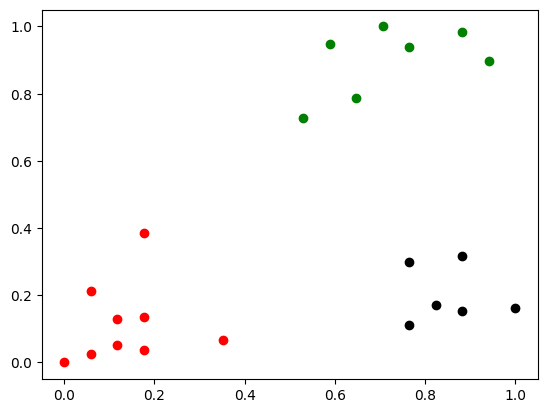

In [74]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1.Income,color='green')
plt.scatter(df2.Age,df2.Income,color='red')
plt.scatter(df3.Age,df3.Income,color='black')

### Silhouette Analysis

In [75]:
from sklearn.metrics import silhouette_score
s=[]
k_rng=range(2,11)

for k in k_rng:
    hc=AgglomerativeClustering(n_clusters=k)
    hc_pred=hc.fit_predict((df[['Age','Income']]))
    s.append(silhouette_score(df[['Age', 'Income']], hc_pred))

s

[0.5600636053855829,
 0.7129710183539274,
 0.6094875531451848,
 0.49019707289438297,
 0.4972566552560926,
 0.4522080792289982,
 0.3580059150146837,
 0.32979725570383067,
 0.3256586458131027]

Hierarchical clustering is better suited for small datasets due to its high time and space complexity.